# Data Analysis Rationale

To predict the house price, certain factors can be considered as intuitive such as the area of the house, the finishing and quality of construction

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


[Link to dataset ]( https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/data_description.txt?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1507384342&Signature=CRuefhzRGVSIKIVeTd46z%2Bitdd%2FI7Xj%2FDldM8EB4GOfgiABDAggR8EN27z8W%2Ft6yRePdSWsJHktX9a6gKV3qy1vLtZr5wI7dc3ydrzKw%2ForONLjpiE2xH6nYsrhjPfMpqn4Ve%2FTPIt0b%2F4NYlUXM2O8H%2FyEJn7eAbqMyE%2FdLA8yTA%2FDMYJ%2Bun5UhiVh2GF%2FjQH2I8gRPjcOSXwuScQnKskt%2FKZR9AzYBOfpmklR20MExNbDGVCjpKrt%2BpzcpB%2BVeGOFDs0iYtZLG4zIG6VM0aZrfK28tq4E%2ByMh6qAdWwepVf1L%2BYFQvzjjtGMy6igV31ZFb3QpwImz%2FBOO3DFHBZA%3D%3D)

[Kaggle Link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation)

In [3]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [4]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

current_palette = sns.color_palette()
%matplotlib inline




# LotFrontage = Linear feet of street connected to property

Discrete

In [27]:
train.LotFrontage.isnull().sum()

0

In [28]:
lot_mean = train.LotFrontage.mean()
train.LotFrontage = train.LotFrontage.fillna(lot_mean)


In [29]:
train.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

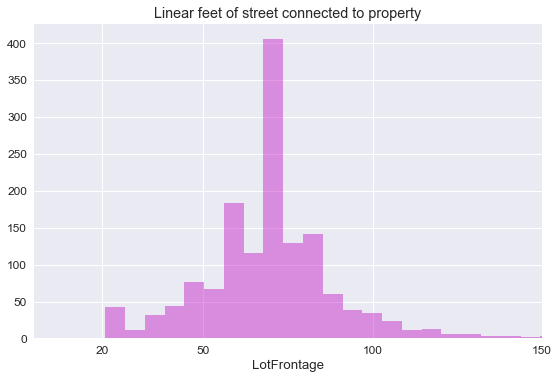

In [144]:
ticks = [20,50,100,150,200]
ax = sns.distplot(train.LotFrontage , kde = False ,color="m")
_ = ax.set_title('Linear feet of street connected to property')
_ = ax.set_xticks(ticks)
_ = ax.set_xlim(0,150)
plt.tight_layout()


# LotArea =  Lot size in square feet 
Discrete

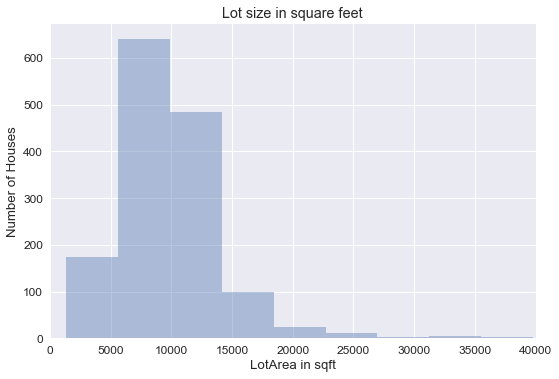

In [90]:
sns.set(font_scale=1.2)
ax = sns.distplot(train.LotArea, kde = False)
_ = ax.set_title('Lot size in square feet')
_ = ax.set_xlim(0,40000)
_= ax.set(xlabel='LotArea in sqft', ylabel='Number of Houses')

plt.tight_layout()


# MSZoning =  Identifies the general zoning classification of the sale.

Interpreting MSZoning: The given attributes constitute the variables in Residential District Zoning classification. In simpler terms, most of the attributes given would be relevant to only a residential district.

     A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       


In [91]:
rl_perc = train["MSZoning"] == "RL"
len(train[rl_perc])/len(train)

0.7883561643835616

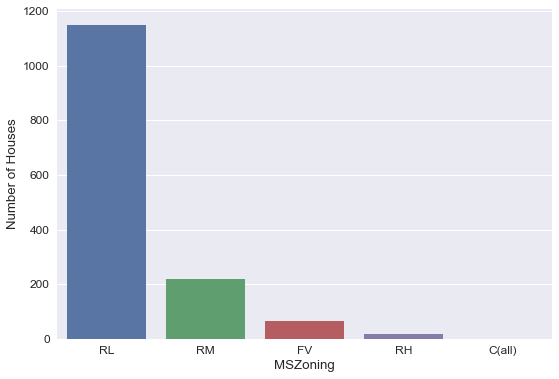

In [94]:
labels = ["RL","RM", "FV", "RH","C(all)"]
ax= sns.countplot(x="MSZoning", data=train , order = labels )
_= ax.set(xlabel='MSZoning', ylabel='Number of Houses')

plt.tight_layout()

## Interpreting the visual encoding: 
78 % of the houses in our dataset is composed of Residential Low Density Houses which implies that the residents belong to a higher income group. We can infer that sale prices in this particular zone is higher than the other given zones. 

In [15]:
train.Alley.isnull().sum()/len(train)


0.93767123287671228

In [16]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [17]:
train.Alley = train.Alley.fillna("No alley access")


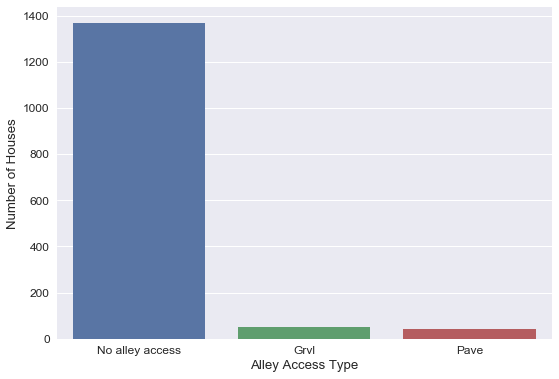

In [145]:
ax = sns.countplot(x="Alley", data=train)
_ = ax.set_ylabel("Number of houses")
_= ax.set(xlabel='Alley Access Type', ylabel='Number of Houses')
ax = sns.set_style("ticks")


plt.tight_layout()


# Alley: Type of alley access to property

Since the majority of the houses in our dataset belong to RL Zone, and have attached garages
##   
       Grvl	 Gravel
       Pave	Paved
       NA 	No alley access
		


# OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

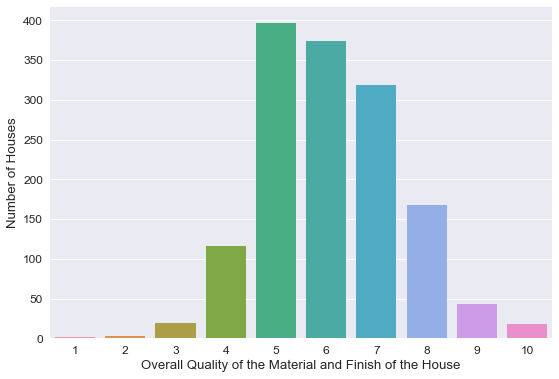

In [19]:
ax = sns.countplot(x="OverallQual", data=train)
_ = ax.set_ylabel("Number of houses")
_= ax.set(xlabel='Overall Quality of the Material and Finish of the House', ylabel='Number of Houses')
plt.tight_layout()

# YearBuilt: Original construction date



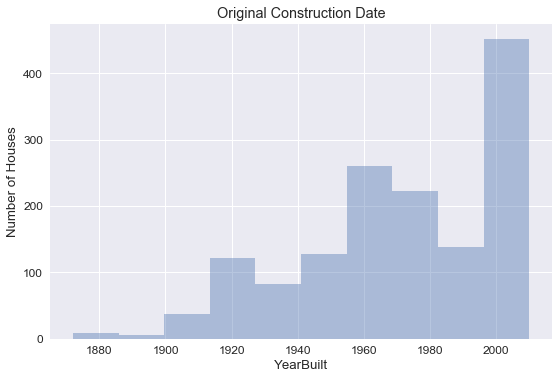

In [20]:
fig = sns.distplot(train["YearBuilt"], kde=False, bins=10)
_ = fig.set_title('Original Construction Date')
_ = fig.set_ylabel('Number of Houses')
_= ax.set(xlabel='Year Built', ylabel='Number of Houses')
plt.tight_layout()




# RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [21]:
train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

<img src="Hip-Roof-vs-Gable-Roof.jpg">

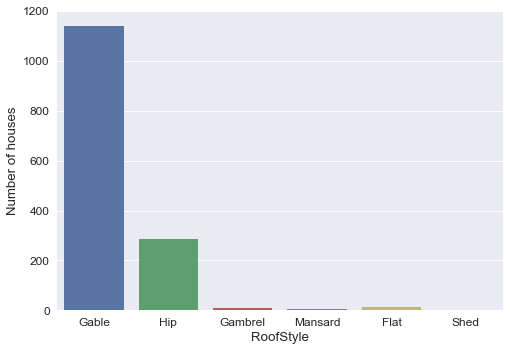

In [24]:
ax = sns.countplot(x="RoofStyle", data=train)
_ = ax.set_ylabel("Number of houses")






# Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	

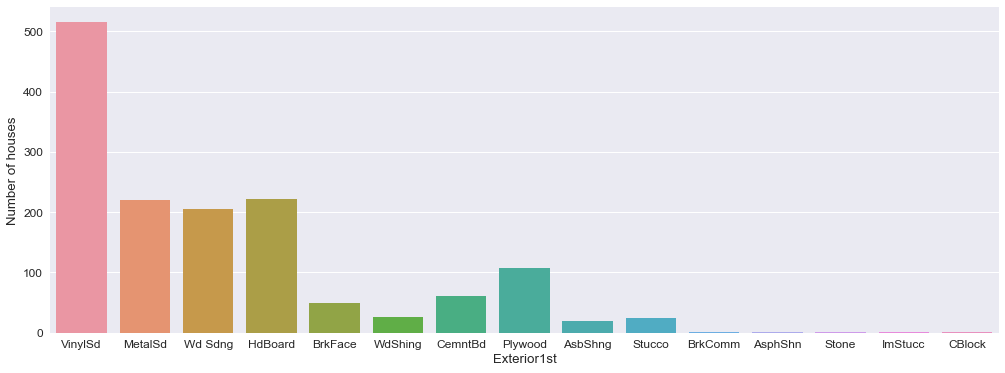

In [23]:
ax = plt.subplots(figsize=(17, 6))
ax = sns.countplot(x="Exterior1st", data=train)
_ = ax.set_ylabel("Number of houses")




# ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

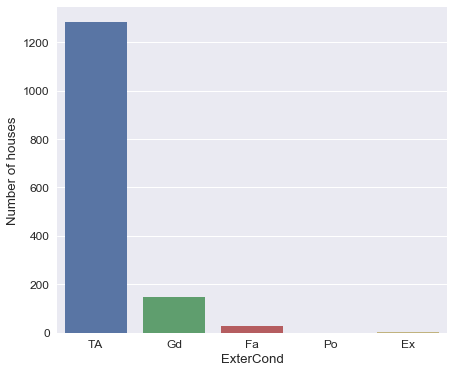

In [38]:
ax = plt.subplots(figsize=(7, 6))
ax = sns.countplot(x="ExterCond", data=train)
_ = ax.set_ylabel("Number of houses")

		
# CentralAir: Central air conditioning

       N	No
       Y	Yes

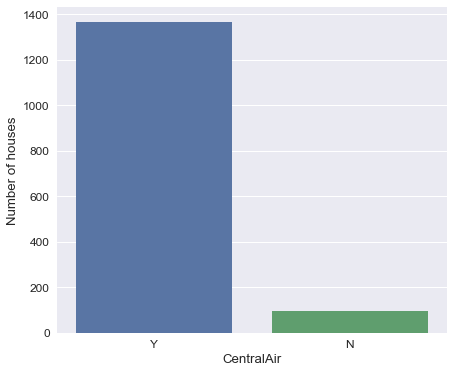

In [37]:
ax = plt.subplots(figsize=(7, 6))
ax = sns.countplot(x="CentralAir", data=train)
_ = ax.set_ylabel("Number of houses")

# HalfBath: Half baths above grade


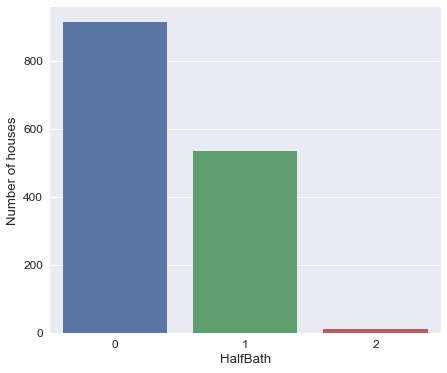

In [39]:
ax = plt.subplots(figsize=(7, 6))
ax = sns.countplot(x="HalfBath", data=train)
_ = ax.set_ylabel("Number of houses")

In [96]:
names = ["MSZoning","LotFrontage","LotArea", "Alley", "OverallQual", "YearBuilt" , "RoofStyle","Exterior1st",
         "ExterCond" ,"CentralAir","HalfBath", "SalePrice"]
train[names].head()

,MSZoning,LotFrontage,LotArea,Alley,OverallQual,YearBuilt,RoofStyle,Exterior1st,ExterCond,CentralAir,HalfBath,SalePrice
0,RL,65.0,8450,No alley access,7,2003,Gable,VinylSd,TA,Y,1,208500
1,RL,80.0,9600,No alley access,6,1976,Gable,MetalSd,TA,Y,0,181500
2,RL,68.0,11250,No alley access,7,2001,Gable,VinylSd,TA,Y,1,223500
3,RL,60.0,9550,No alley access,7,1915,Gable,Wd Sdng,TA,Y,0,140000
4,RL,84.0,14260,No alley access,8,2000,Gable,VinylSd,TA,Y,1,250000


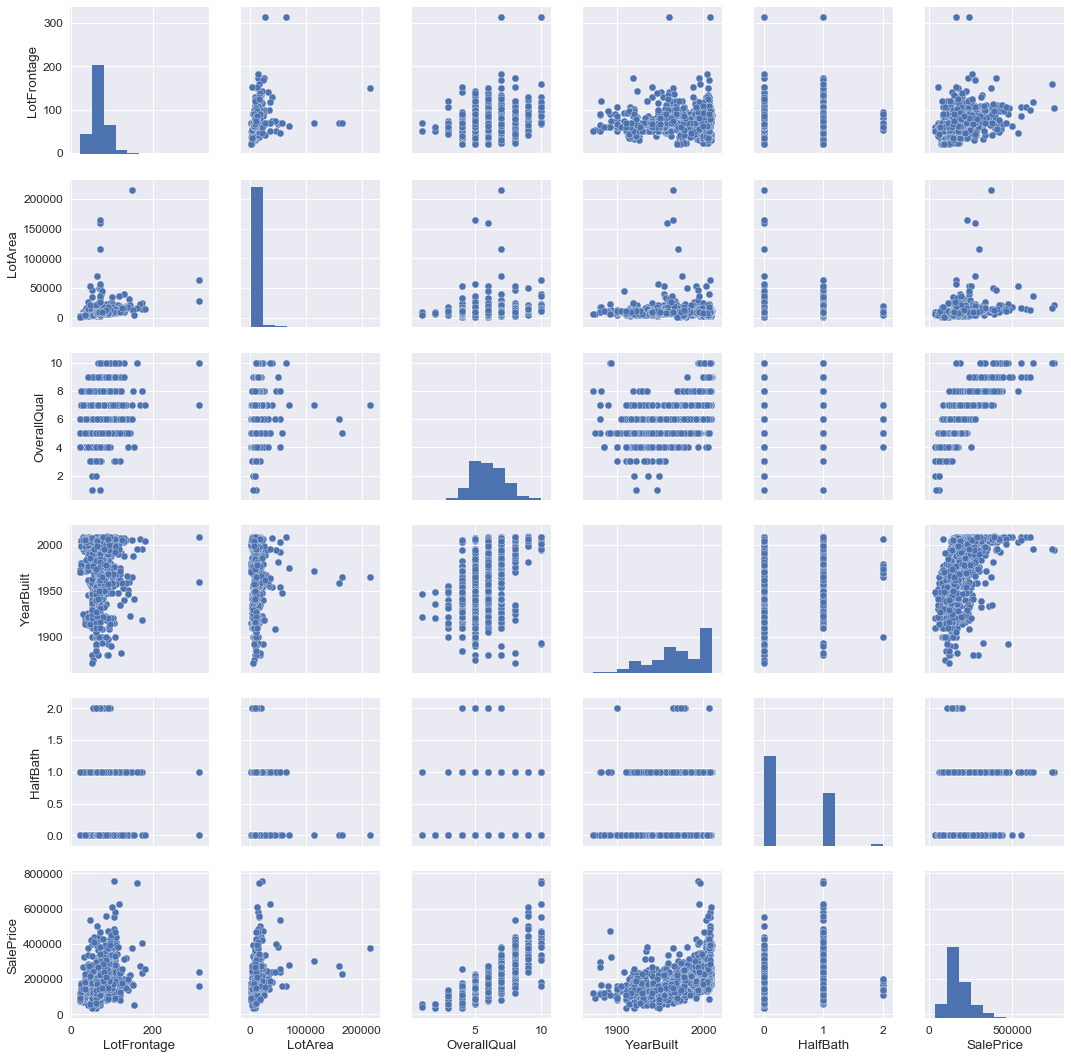

In [97]:
g = sns.pairplot(train[names])


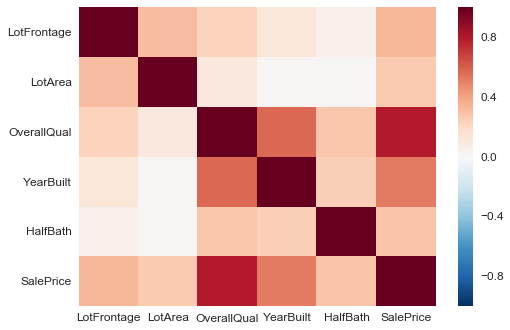

In [98]:
corr_data = train[names].corr()
ax = sns.heatmap(corr_data, center=0)

#  Plot the pairwise relationship between the sale price and Lot Size

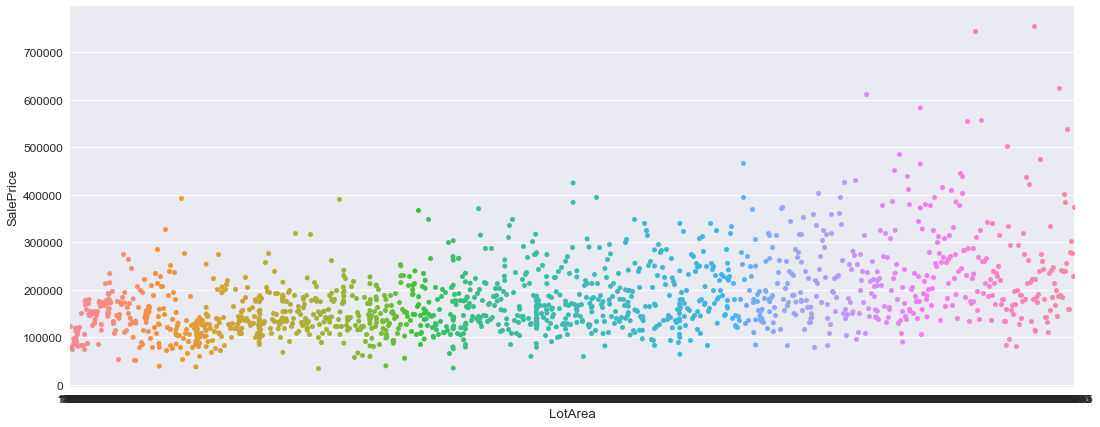

In [103]:
ax = plt.subplots(figsize=(18, 7))

ax = sns.swarmplot(x="LotArea", y="SalePrice", data=train)

#  Plot the pairwise relationship between the sale price and Rates the overall material and finish of the house


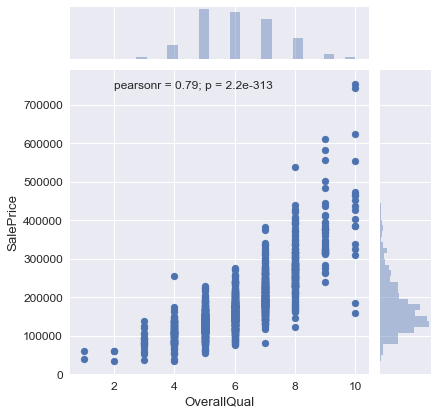

In [100]:
ax = sns.jointplot(x="OverallQual", y="SalePrice", data=train);

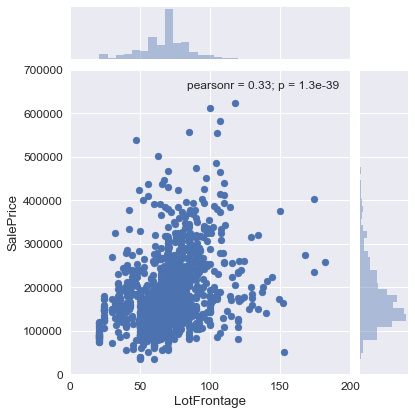

In [117]:
ax = sns.jointplot(x="LotFrontage", y="SalePrice", data=train,xlim=(0, 200), ylim = (0,700000))


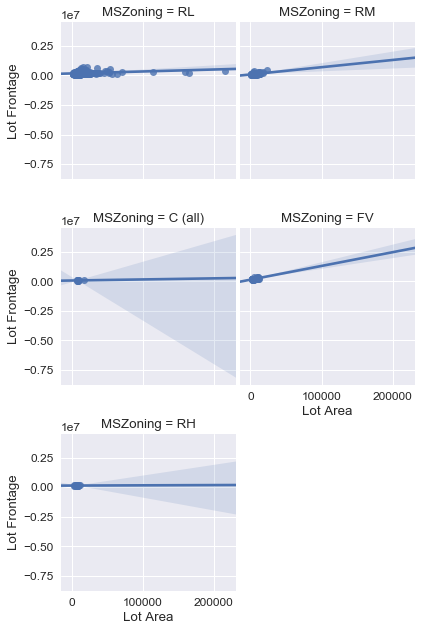

In [143]:
ax = sns.lmplot(y="SalePrice", x="LotArea", data=train, col ="MSZoning", x_jitter=0.5,col_wrap=2, size=3 )

ax.set_axis_labels("Lot Area", "Lot Frontage")
#ax.set(xlim=(0, 100000), ylim=(0, 500))
ax.fig.subplots_adjust(wspace=.02)


In [ ]:
sns.boxplot(x="OverallQual", y="SalePrice", data=train)

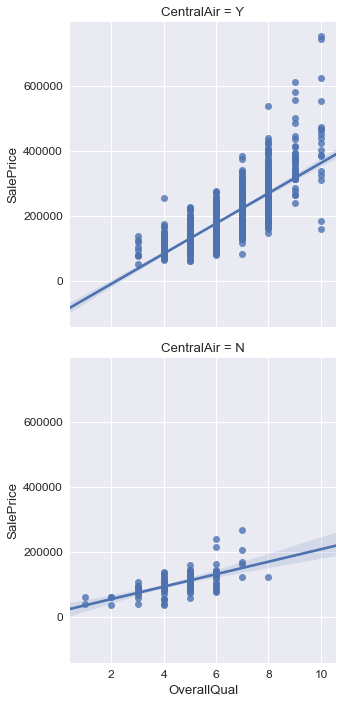

In [59]:
ax = sns.lmplot(x='OverallQual', y='SalePrice', data = train, row ="CentralAir")


In [ ]:
sns.jointplot(x = "hp", y="mpg", data=auto )